In [ ]:
import math as m
from copy import copy
import xlrd
import csv 
import math
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import normaltest

import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neural_network import MLPClassifier as NeuralNetwork
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

from statsmodels.tools.tools import add_constant
from statsmodels.stats.stattools import durbin_watson
from statsmodels.regression.linear_model import OLS
from statsmodels.graphics.gofplots import qqplot
import statsmodels.stats.api as sms
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


*italicized text*
### **Data Analysis**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

#DATA: Add shortcut to your google drive

# OnlineNewsPopularity.csv :
# https://drive.google.com/file/d/1AwStb9o5Lf5j8cWjgUa7rwqJqPNM5zzl/view?usp=sharing

original_data = pd.read_csv("drive/MyDrive/NLP/OnlineNewsPopularity.csv")
original_data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
original_data.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [ ]:
X = original_data[[' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs',
                   ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus',
                   ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max',
                   ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess',
                   ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday',
                   ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_sentiment_polarity', ' global_rate_positive_words',
                   ' global_rate_negative_words', ' rate_positive_words', ' rate_negative_words', ' avg_positive_polarity', ' min_positive_polarity', ' max_positive_polarity',
                   ' avg_negative_polarity', ' min_negative_polarity', ' max_negative_polarity', ' title_subjectivity', ' title_sentiment_polarity', ' abs_title_subjectivity',
                   ' abs_title_sentiment_polarity']].copy()


y = original_data[' shares'].copy()


In [ ]:
from sklearn.model_selection import train_test_split

# Split into validation set
X_remained, X_test, y_remained, y_test = train_test_split(X, y, test_size = 0.2, random_state = 52)
X_train, X_val, y_train, y_val = train_test_split(X_remained, y_remained, test_size = 0.25, random_state = 52)


Intro to Scikit-learn’s k-Nearest-Neighbors Classifier And Regressor

https://towardsdatascience.com/intro-to-scikit-learns-k-nearest-neighbors-classifier-and-regressor-4228d8d1cba6


In [ ]:
from sklearn.neighbors import KNeighborsRegressor


In [ ]:

# Initialize kNN
knn = KNeighborsRegressor(n_neighbors=5)

# Fit and score
knn.fit(X_train, y_train)

knn.score(X_val, y_val)

-0.10652722862691055

In [ ]:

# Initialize kNN
knn = KNeighborsRegressor(n_neighbors=1)

# Fit and score
knn.fit(X_train, y_train)

knn.score(X_val, y_val)

-1.0313787425620844

In [ ]:

# Initialize kNN
knn = KNeighborsRegressor(n_neighbors=2)

# Fit and score
knn.fit(X_train, y_train)

knn.score(X_val, y_val)

-0.3223032143312634

In [ ]:

# Initialize kNN
knn = KNeighborsRegressor(n_neighbors=3)

# Fit and score
knn.fit(X_train, y_train)

knn.score(X_val, y_val)

-0.2289533604988776

In [ ]:

# Initialize kNN
knn = KNeighborsRegressor(n_neighbors=4)

# Fit and score
knn.fit(X_train, y_train)

knn.score(X_val, y_val)

-0.14318485361173727

In [ ]:
def plot_complexity_curve(k_list, knn_model, x_train, X_val, y_train, y_val):
    
    train_scores = []
    test_scores = []
    
    # For each k
    for k in k_list:
        # Initialize, fit, predict
        knn = knn_model(k)
        
        knn.fit(x_train, y_train)
        
        train_scores.append(knn.score(x_train, y_train))
        test_scores.append(knn.score(X_val, y_val))

    # Plot
    fig, ax = plt.subplots()
    
    ax.plot(k_list, train_scores, label='Training Accuracy', color='red')
    ax.plot(k_list, test_scores, label='Testing Accuracy', color='black')

    ax.set(title='k-NN with Different Values for $k$',
           xlabel='Number of Neighbors',
           ylabel='Accuracy')
    
    ax.legend()

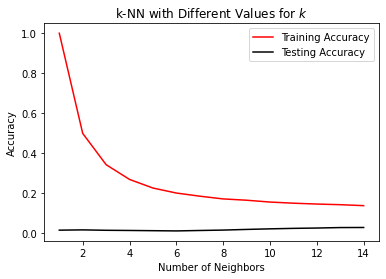

In [ ]:
# Create possible values for k
neighbors = np.arange(1, 15)

plot_complexity_curve(neighbors, KNeighborsClassifier, 
                    X_train, X_val, y_train, y_val)



### **Improving the Performance of kNN, Feature Scaling**



In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:

# Initiate the scaler
scaler = MinMaxScaler()

# Fit/transform to all numeric data
X_prepped = scaler.fit_transform(X)

# Split into validation set
X_remained, X_test, y_remained, y_test = train_test_split(X_prepped, y, test_size = 0.2, random_state = 52)
X_train, X_val, y_train, y_val = train_test_split(X_remained, y_remained, test_size = 0.25, random_state = 52)


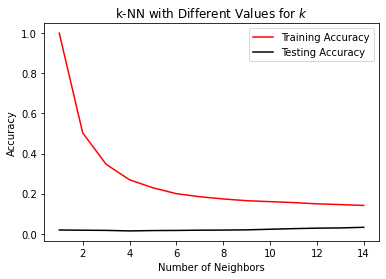

In [ ]:
k_list = np.arange(1, 15)

plot_complexity_curve(k_list, KNeighborsClassifier, 
                    X_train, X_test, y_train, y_test)

Concluding Remarks
I want to finish the article by summarizing the pros and cons of kNN.

### **Pros:**

Very simple algorithm, 
easy to interpret

Fast training phase

No assumption of the underlying distribution of data

Versatile — can be used both for regression and classification


### **Cons:**

Very slow predicting phase

Heavy memory usage because it stores all data

Sensitive to magnitudes — that’s why need features need to be scaled

Sensitive to outliers and noise

Suffers from the curse of dimensionality

Thanks for reading!